# EMRISur1dq1e4

Notebook Author: Tousif Islam (tislam@umassd.edu)

The waveform model, EMRISur1dq1e4, is described in https://arxiv.org/abs/1910.10473 (Nur E. M. 2019 et. al.). 

EMRISur1dq1e4 is a surrogate gravitational-waveform model for non-spinning black hole binary systems with mass-ratios varying from 3 to $10^4$. This surrogate model is trained on waveform data generated by point-particle black hole perturbation theory (ppBHPT), with the total mass rescaling paramter tuned to NR simulations according to the paper's Eq. 4. Available modes are  $\{(2,2), (2,1), (3,3), (3,2), (3,1), (4,4), (4,3), (4,2), (5,5), (5,4), (5,3)\}$. The $m<0$ modes can be deduced from the m>0 modes due to symmetry of the system about the orbital plane. 

NOTE : This notebook rquires the file emri_sur_load.py and EMRISur1dq1e4.h5 datafile in the same directory for waveform generation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emri_sur_load as emriSur
import scipy
from scipy.interpolate import InterpolatedUnivariateSpline as Spline
from scipy.interpolate import splrep, splev

# Evaluation example

Input: mass ratio q, and (optionally) modes to generate = [(2,1),(2,2),(3,1),(3,2),(3,3),(4,2),(4,3),(4,4),(5,3),(5,4),(5,5)]

Output: dictionary of modes with surrogate waveform

Both h and t are in geometric units

In [2]:
q = 300.0 # mass ratio
time, h_out = emriSur.generate_surrogate(q) #h_out is a dictionary with modes as key; defaults to all avail modes

/home/balzani57/pool/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


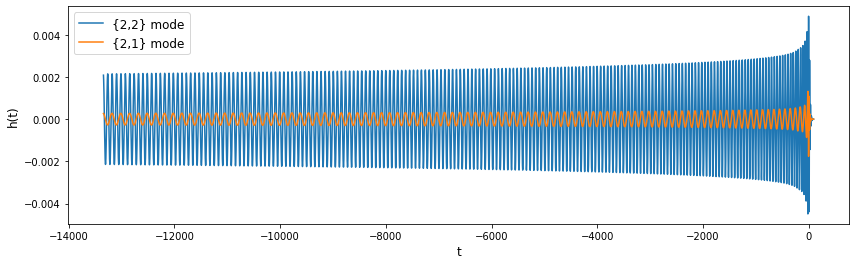

In [3]:
h_22=h_out[(2,2)]
h_21=h_out[(2,1)]

plt.figure(figsize=(14,4))
plt.plot(time,np.real(h_22),label='{2,2} mode')
plt.plot(time,np.real(h_21),label='{2,1} mode')
plt.xlabel('t',fontsize=12)
plt.ylabel('h(t)',fontsize=12)
plt.legend(fontsize=12)
#plt.savefig('emri_sur_q_%f.png'%q)
plt.show()

# Evaluation example : Physical Waveforms

Scales the waveform obtained in geometrc unit to physical units

The example below is shown for 22 mode only.

Input: total mass M (in Solar Mass unit), luminosity distance dL (Mpc)

In [4]:
G=6.674*1e-11
MSUN_SI = 1.9885469549614615e+30
PC_SI = 3.085677581491367e+16
C_SI = 299792458.0

# values of M and dL
M=80.0*MSUN_SI
dL=100.0* PC_SI
# scaling of time and h(t)
time=time*(G*M/C_SI**3)
ht22=np.array(h_out[(2,2)])*(G*M/C_SI**3)/dL

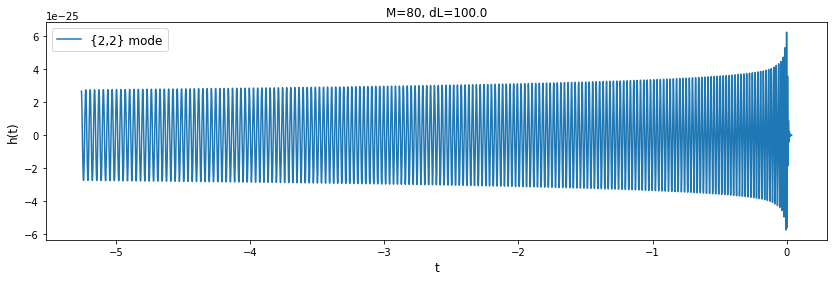

In [5]:
plt.figure(figsize=(14,4))
plt.title('M=80, dL=100.0')
plt.plot(time,np.real(ht22),label='{2,2} mode')
plt.xlabel('t',fontsize=12)
plt.ylabel('h(t)',fontsize=12)
plt.legend(fontsize=12)
#plt.savefig('emri_sur_q_%f_physical.png'%q)
plt.show()

# Test: EMRI Surrogate vs NR

Here we repeat the experiment shown in Figure 3 (https://arxiv.org/pdf/1910.10473.pdf) which compares the EMRI surrogate model to Numerical Relativity waveforms in the range q <=10. 

Our numerical relativity waveforms will be generated using another (different) surrogate model provided in the GWSurrogate package. 

To install gwsurrogate do:

```bash
>>> pip install gwsurrogate
```

To get the numerical relativity surrogate model, open up ipython and do

```python
>>> import gwsurrogate as gws
>>> gws.catalog.pull("SpEC_q1_10_NoSpin")
```

In [6]:
import gwsurrogate as gws
#gws.catalog.pull("SpEC_q1_10_NoSpin")

# gwtools is installed as a dependency of gwsurrogate
from gwtools.gwtools import modes_list_to_dict, minimize_norm_error, euclidean_norm_sqrd, q_to_nu
from gwtools.mismatch import mathcal_E_error_from_mode_list

emri_modes = [(2,2),(2,1),(3,3),(3,1),(3,2),(4,4),(4,2),(4,3),(5,5),(5,3),(5,4)]

#path_to_surrogate = '/bigdata/nur/nrifat/data/lower_mass/SpEC_q1_10_NoSpin_nu5thDegPoly_exclude_2_0.h5'
path_to_surrogate = gws.__path__[0]+'/surrogate_downloads/SpEC_q1_10_NoSpin_nu5thDegPoly_exclude_2_0.h5'
spec = gws.EvaluateSurrogate(path_to_surrogate, ell_m=emri_modes)

/home/balzani57/Repo/GitRepos/Codes/gwtools/gwtools/rotations.py:63: UserWarning: Could not import GWFrames, needed for rotations module
  _warnings.warn("Could not import GWFrames, needed for rotations module")
/home/balzani57/Repo/GitRepos/Codes/gwtools/gwtools/__init__.py:11: UserWarning: Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.
  _warnings.warn("Could not import rotations, decompositions, or fitfuncs. These are not needed by GWSurrogate.")


setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work
loading surrogate mode... l2_m2

>>> Found surrogate ID from file name: SpEC_q1_10_NoSpin
>>> tmin, tmax, dt are depricated as of 11/23/2016.
loading surrogate mode... l2_m1

>>> Found surrogate ID from file name: SpEC_q1_10_NoSpin
>>> tmin, tmax, dt are depricated as of 11/23/2016.
loading surrogate mode... l3_m3

>>> Found surrogate ID from file name: SpEC_q1_10_NoSpin
>>> tmin, tmax, dt are depricated as of 11/23/2016.
loading surrogate mode... l3_m1

>>> Found surrogate ID from file name: SpEC_q1_10_NoSpin
>>> tmin, tmax, dt are depricated as of 11/23/2016.
loading surrogate mode... l3_m2

>>> Found surrogate ID from file name: SpEC_q1_10_NoSpin
>>> tmin, tmax, dt are depricated as of 11/23/2016.
loading surrogate mode..

In [7]:
# generate a q=8 EMRI and NR waveform
q=8
time_emri, h_emri = emriSur.generate_surrogate(q)

modes_spec, times_spec, hp_spec, hc_spec = spec(q=q, mode_sum=False, fake_neg_modes=False)
h_spec = hp_spec + 1.0j*hc_spec
h_spec = modes_list_to_dict(modes_spec,h_spec)

/home/balzani57/pool/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


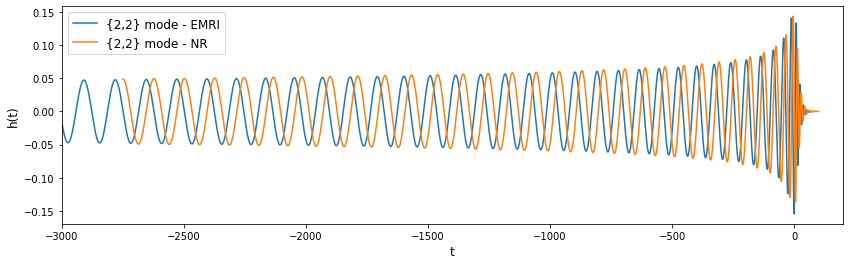

In [8]:
# waveforms have not yet been aligned in time and phase
plt.figure(figsize=(14,4))
plt.plot(time_emri,np.real(h_emri[(2,2)]),label='{2,2} mode - EMRI')
plt.plot(times_spec,np.real(h_spec[(2,2)]),label='{2,2} mode - NR')
plt.xlabel('t',fontsize=12)
plt.ylabel('h(t)',fontsize=12)
plt.legend(fontsize=12)
#plt.savefig('emri_sur_q_%f.png'%q)
plt.xlim([-3000,200])
plt.show()

In [9]:
## here we minimize the error over time and phase shifts for the (2,2) mode only
[errors_before_min, errors_after_min], [tc, phic], [common_times,h_emri_aligned,h_nr_aligned] = \
minimize_norm_error(time_emri,h_emri[(2,2)],times_spec,h_spec[(2,2)],\
    euclidean_norm_sqrd,t_low_adj=5,t_up_adj=2,method='nelder-mead')
print(errors_before_min)
print(errors_after_min)
print(tc) # time shift needed
print(phic) # phase shift needed

0.24015724798649388
0.022794681591347312
-0.641252194018481
-328.4413200962693


(-0.15, 0.15)

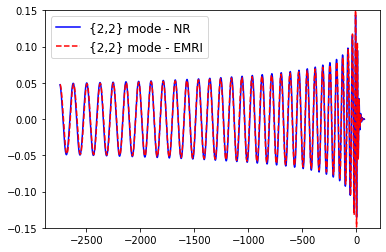

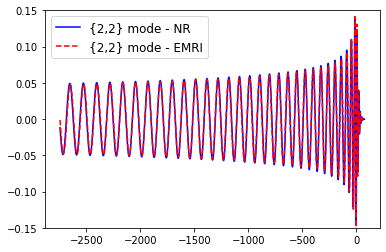

In [10]:
# plot waveforms after minimizations
plt.figure(1)
plt.plot(common_times, np.real(h_nr_aligned),'blue',label='{2,2} mode - NR')
plt.plot(common_times, np.real(h_emri_aligned),'r--',label='{2,2} mode - EMRI')
plt.legend(fontsize=12)
plt.ylim(-0.15,0.15)

plt.figure(2)
plt.plot(common_times, np.imag(h_nr_aligned),'blue',label='{2,2} mode - NR')
plt.plot(common_times, np.imag(h_emri_aligned),'r--',label='{2,2} mode - EMRI')
plt.legend(fontsize=12)
plt.ylim(-0.15,0.15)

## Regeneration fig 3 of https://arxiv.org/abs/1910.10473

Here we repeat the previous comparision for mass ratios $3 \leq q \leq 10$ using the same L2-type norm for data plotted in figure 3.

In [12]:
l2_error = []
qs = [3,4,5,6,7,8,9,10]

for q in qs:
    modes_spec, times_spec, hp_spec, hc_spec = spec(q=q, mode_sum=False, fake_neg_modes=False)
    h_spec = hp_spec + 1.0j*hc_spec
    h_spec = modes_list_to_dict(modes_spec,h_spec)

    time_emri, h_emri = emriSur.generate_surrogate(q, modes = [(2,2)])    
    
    [errors_before_min, errors_after_min], [tc, phic], [t1,h1_matched,h_ref] = \
    minimize_norm_error(time_emri,h_emri[(2,2)],times_spec,h_spec[(2,2)],\
        euclidean_norm_sqrd,t_low_adj=5,t_up_adj=2,method='nelder-mead')
    
    l2_error.append(mathcal_E_error_from_mode_list(h_ref, h1_matched))
    print("q = %i, error = %e"%(q,l2_error[-1]))

q = 3, error = 2.915079e-02
q = 4, error = 2.275066e-02
q = 5, error = 1.853627e-02
q = 6, error = 1.533749e-02
q = 7, error = 1.310102e-02
q = 8, error = 1.139734e-02
q = 9, error = 1.001243e-02
q = 10, error = 8.969378e-03


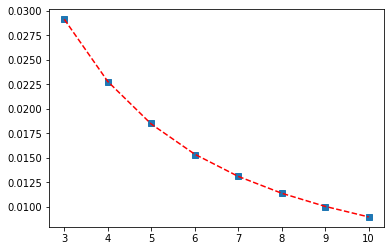

In [13]:
# Ref https://arxiv.org/abs/1910.10473 also models the difference between NR and the EMRI mode, 
# which we show agrees with the data just generated above
nus = q_to_nu(np.array(qs))
error_model = 0.07625433*nus + 0.3647208*nus**2.0 + 0.3073809*nus**3.0

plt.figure(1)
plt.plot(qs, l2_error, 's')
plt.plot(qs, error_model,'r--')
plt.show()